In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
df = pd.read_csv('data_20221_cleaned.csv')

In [ ]:
df.head()

,Well ID,S.No,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,Year,pH,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,W113126092431802,1.0,A&N Islands,South Andaman,PORT BLAIR,Kodiaghat,11.545,92.74583,2021.0,7.74,...,NaN,175.0,34.0,22.0,10.0,0.0,0.84,NaN,206.0,4.8
1,W113616092411001,2.0,A&N Islands,South Andaman,PORT BLAIR,Sippighat,11.6025,92.73,2021.0,7.53,...,NaN,250.0,52.0,29.0,51.0,1.0,0.28,NaN,381.0,6.4
2,W113640092443301,3.0,A&N Islands,South Andaman,PORT BLAIR,Brichganj,11.62083,92.73028,2021.0,7.5,...,NaN,125.0,4.0,28.0,10.0,1.0,0.46,NaN,151.0,BDL
3,W114421092422801,4.0,A&N Islands,South Andaman,FERRARGUNJ,Wimberleyganj,11.7325,92.70861,2021.0,7.6,...,NaN,135.0,26.0,17.0,15.0,2.0,0.37,NaN,198.0,0.4
4,W113955092391801,5.0,A&N Islands,South Andaman,FERRARGUNJ,Ograbraj,11.66361,92.65806,2021.0,7.82,...,NaN,465.0,56.0,79.0,336.0,18.0,0.95,NaN,1424.0,BDL


In [ ]:
columns_to_drop = ['Well ID', 'S.No', 'STATE', 'DISTRICT', 'BLOCK', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'Year', 'PO4', 'SiO2', 'TDS', 'U(ppb)']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,7.74,349.0,0,183.0,25.0,1,1,175.0,34.0,22.0,10.0,0.0,0.84
1,7.53,660.0,0,262.0,82.0,5,1,250.0,52.0,29.0,51.0,1.0,0.28
2,7.5,270.0,0,116.0,35.0,1,0,125.0,4.0,28.0,10.0,1.0,0.46
3,7.6,311.0,0,159.0,39.0,2,0,135.0,26.0,17.0,15.0,2.0,0.37
4,7.82,2501.0,0,512.0,560.0,56,5,465.0,56.0,79.0,336.0,18.0,0.95


In [ ]:
# Convert everything to numeric
# errors='coerce'
# If any value can’t be converted to a number, don’t crash — instead, replace it with NaN (Not a Number)."

df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.head(5)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84
1,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28
2,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46
3,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37
4,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95


In [ ]:
# Filling missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df.head(3)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84
1,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28
2,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46


In [ ]:
# Water quality labels
conditions = [
    (df['pH'] >= 6.5) & (df['pH'] <= 8.5) &
    (df['EC'] <= 1500) &
    (df['TH'] <= 120) &
    (df['NO3'] <= 10) &
    (df['Na'] <= 200) &
    (df['K'] <= 10) &
    (df['F'] <= 1.5),

    (df['pH'] < 6.5) | (df['pH'] > 8.5) |
    (df['EC'] > 1500) |
    (df['TH'] > 120) |
    (df['NO3'] > 10) |
    (df['Na'] > 200) |
    (df['K'] > 10) |
    (df['F'] > 1.5)
]

choices = ['Good', 'Poor']
df['Water_Quality'] = np.select(conditions, choices, default='Moderate')

In [ ]:
df.head(3)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,Water_Quality
0,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84,Poor
1,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28,Poor
2,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46,Poor


In [ ]:
df[df['Water_Quality'] == 'Good'].head(3)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,Water_Quality
13,7.22,147.0,0.0,49.0,25.0,0.0,0.0,50.0,16.0,2.0,9.0,1.0,0.37,Good
15,7.59,253.0,0.0,122.0,28.0,1.0,1.0,110.0,22.0,13.0,11.0,2.0,0.47,Good
18,7.38,186.0,0.0,92.0,21.0,0.0,1.0,80.0,22.0,6.0,9.0,2.0,0.48,Good


In [ ]:
# Label Encoding numerical values
label_encoder = LabelEncoder()
df['Water_Quality'] = label_encoder.fit_transform(df['Water_Quality'])

In [ ]:
df.head(3)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,Water_Quality
0,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84,1
1,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28,1
2,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46,1


In [ ]:
# Data Preparation for Training
X = df.drop('Water_Quality', axis=1)
y = df['Water_Quality']
# y_categorical = to_categorical(y)

In [ ]:
# y_categorical

In [ ]:
# Input features Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.27017936, -0.4695579 , -0.19600538, ..., -0.4321578 ,
        -0.29939258, -0.07857594],
       [-0.27059477, -0.27155991, -0.19600538, ..., -0.27347762,
        -0.28074155, -0.14627672],
       [-0.27065411, -0.51985322, -0.19600538, ..., -0.4321578 ,
        -0.28074155, -0.12451575],
       ...,
       [-0.26871552, -0.1467766 , -0.10569645, ...,  0.05162323,
        -0.21359784, -0.18012711],
       [-0.26826054, -0.23527088, -0.10569645, ..., -0.34701234,
        -0.20240722, -0.1656198 ],
       [-0.2682012 ,  0.05504129, -0.10569645, ...,  0.04001248,
        -0.19867701, -0.16320192]])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

**Multi Layer Perceptron**

In [ ]:
# Multi-Layer Perceptron Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8192 - loss: 0.5259 - val_accuracy: 0.9469 - val_loss: 0.1363
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9427 - loss: 0.1339 - val_accuracy: 0.9613 - val_loss: 0.1051
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.1006 - val_accuracy: 0.9727 - val_loss: 0.0899
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9601 - loss: 0.0991 - val_accuracy: 0.9674 - val_loss: 0.0824
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9672 - loss: 0.0804 - val_accuracy: 0.9795 - val_loss: 0.0738
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0766 - val_accuracy: 0.9727 - val_loss: 0.0711
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9703 - loss: 0.0737 - val_accuracy: 0.9780 - val_loss: 0.0648
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9666 - loss: 0.0734 - val_accuracy: 0.

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy:.5f}")

Test Accuracy: 0.98846


In [ ]:
y_prediction_labels = model.predict(X_test)
y_prediction = np.argmax(y_prediction_labels, axis=1)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_prediction, target_names=label_encoder.classes_))


Classification Report:

              precision    recall  f1-score   support

        Good       0.90      0.96      0.93       132
        Poor       1.00      0.99      0.99      1515

    accuracy                           0.99      1647
   macro avg       0.95      0.98      0.96      1647
weighted avg       0.99      0.99      0.99      1647



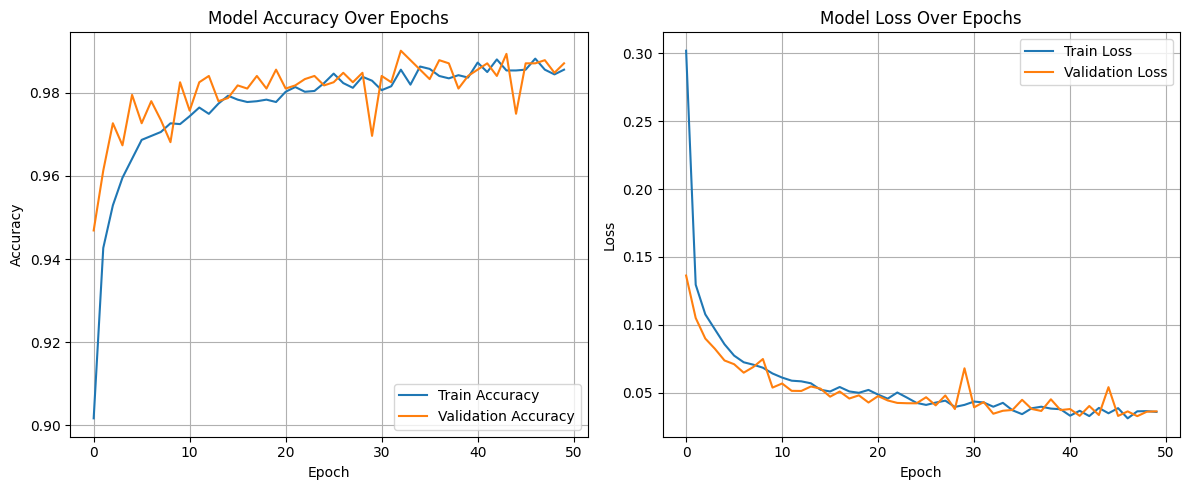

In [ ]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('water_quality_model.h5')

In [ ]:
# Save the scaler and label encoder
import joblib
joblib.dump(scaler, 'water_quality_scaler.pkl')
joblib.dump(label_encoder, 'water_quality_label_encoder.pkl')

['water_quality_label_encoder.pkl']

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = model_2.predict(X_test)

In [ ]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy_2 = accuracy_score(y_test, y_pred2)
print(f"Test Accuracy: {accuracy_2:.5f}")

Test Accuracy: 0.99575


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))

Classification Report:

              precision    recall  f1-score   support

        Good       0.97      0.98      0.97       132
        Poor       1.00      1.00      1.00      1515

    accuracy                           1.00      1647
   macro avg       0.98      0.99      0.99      1647
weighted avg       1.00      1.00      1.00      1647



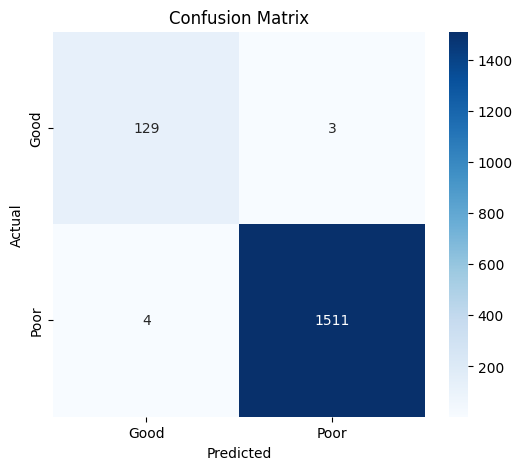

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

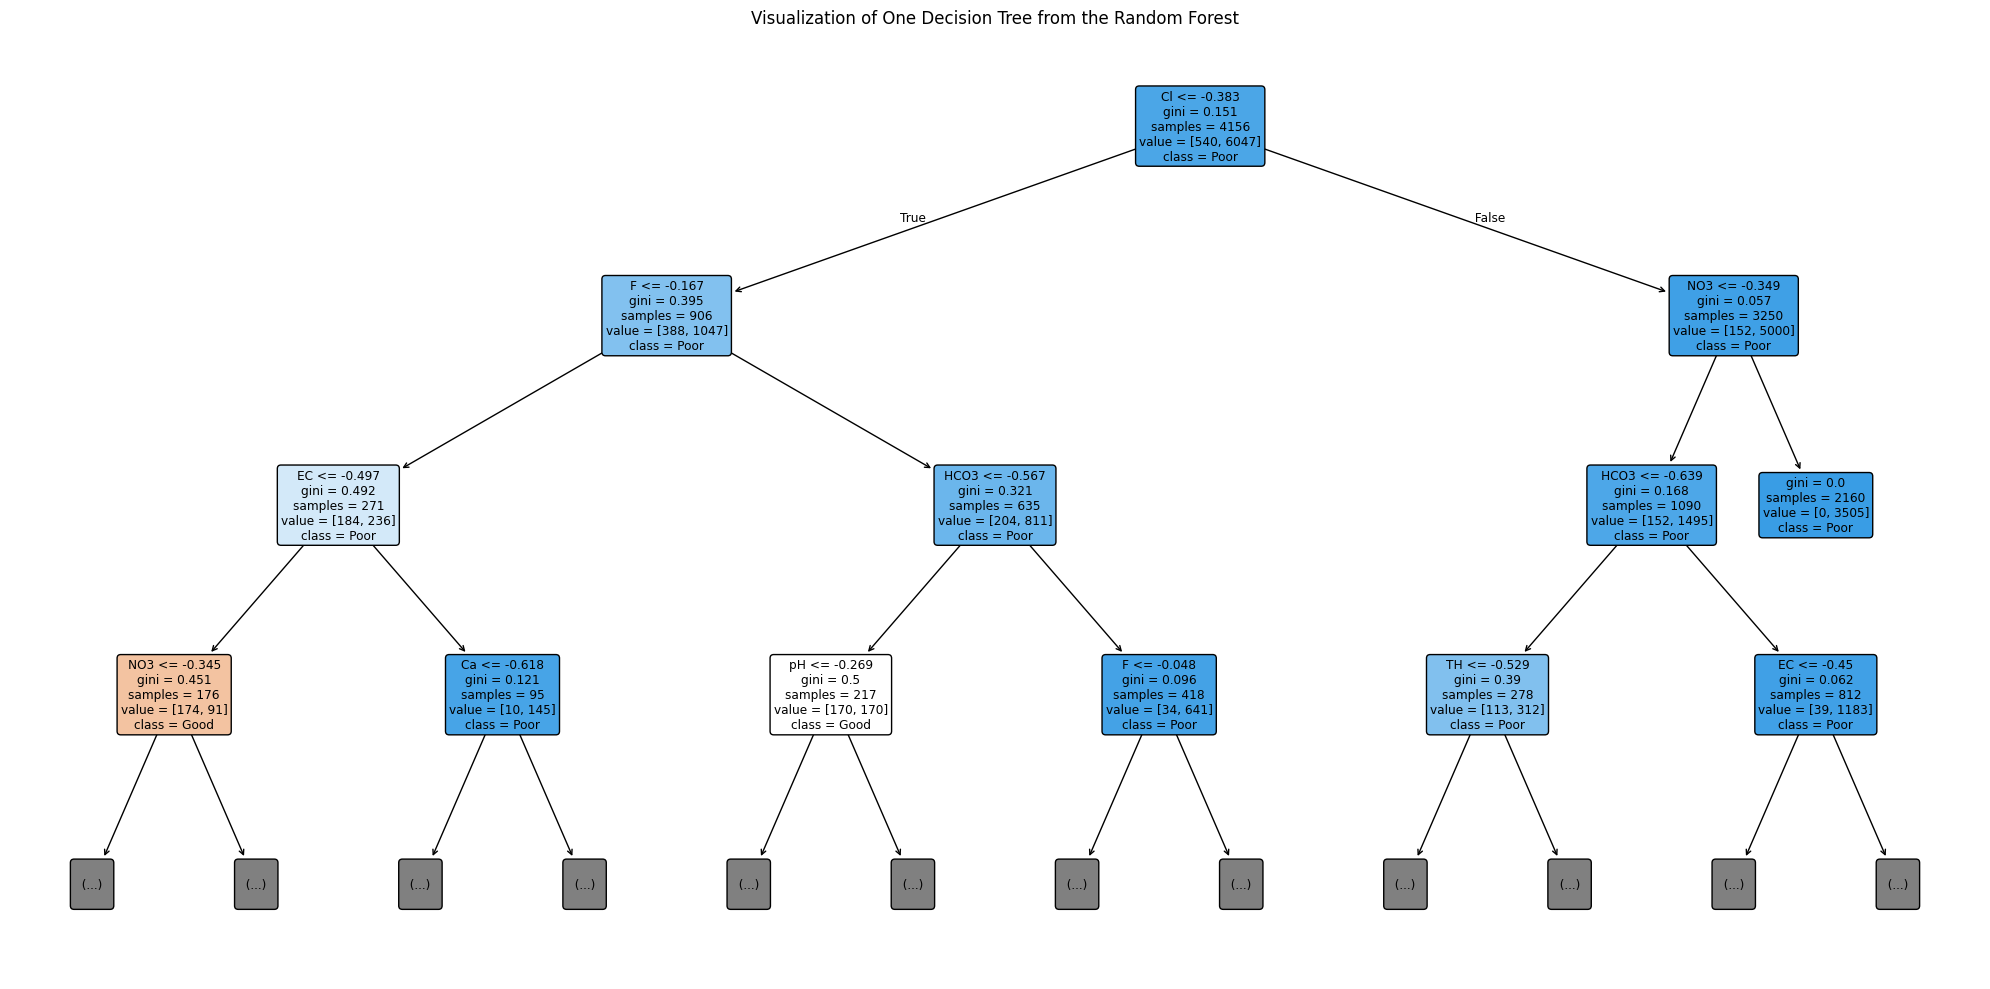

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model_2.estimators_[0], feature_names=X.columns, class_names=label_encoder.classes_,
          filled=True, rounded=True, max_depth=3)
plt.title("Visualization of One Decision Tree from the Random Forest")
plt.tight_layout()
plt.show()